## Importação das Bibliotecas

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação do Banco de Dados

Foi utilizado o arquivo compactado para diminuir o tamanho do arquivo utilizado.

In [76]:
# importar localmente
df = pd.read_csv('DelayedFlights.zip')

## Tratamento dos dados

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [78]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', 30)
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [79]:
#Dicionário de mapeamento de colunas
mapeamento_colunas = {
'Year': 'ANO',
'Month': 'MES',
'DayofMonth': 'DIA_MES',
'DayOfWeek': 'DIA_SEMANA',
'DepTime': 'HORA_PARTIDA_REAL',
'CRSDepTime': 'HORA_PARTIDA_PROGRAMADA',
'ArrTime': 'HORA_CHEGADA_REAL',
'CRSArrTime': 'HORA_CHEGADA_PROGRAMADA',
'UniqueCarrier': 'CODIGO_AVIAO',
'FlightNum': 'NUMERO_VOO',
'TailNum': 'NUMERO_CALDA',
'ActualElapsedTime': 'DURACAO_VOO_REAL',
'CRSElapsedTime': 'DURACAO_VOO_PROGRAMADA',
'AirTime': 'DURACAO_AR_REAL',
'ArrDelay': 'ATRASO_CHEGADA',
'DepDelay': 'ATRASO_PARTIDA',
'Origin': 'ORIGEM',
'Dest': 'DESTINO',
'Distance': 'DISTANCIA',
'TaxiIn': 'TEMPO_PISTA_DECOLAGEM',
'TaxiOut': 'TEMPO_PISTA_POUSO',
'Cancelled': 'CANCELADO',
'CancellationCode': 'MOTIVO_CANCELAMENTO',
'Diverted': 'DESVIADO',
'CarrierDelay': 'TEMPO_ATRASO_COMPANHIA',
'WeatherDelay': 'TEMPO_ATRASO_CLIMA',
'NASDelay': 'TEMPO_ATRASO_SNA',
'SecurityDelay': 'TEMPO_ATRASO_SEGURANCA',
'LateAircraftDelay': 'TEMPO_ATRASO_AERONAVE'}

In [80]:
# Renomear as colunas
df = df.rename(columns=mapeamento_colunas)

In [81]:
df['ANO'].unique()

array([2008], dtype=int64)

In [82]:
# Removendo colunas desnecessárias para a análise
df = df.drop(['Unnamed: 0', 'ANO', 'NUMERO_VOO','NUMERO_CALDA'], axis = 1)

Avaliando a consistência dos dados.  
Ex: se há mais do que 12 meses, 31 dias, 7 dias na semana.

In [83]:
df.nunique()

MES                          12
DIA_MES                      31
DIA_SEMANA                    7
HORA_PARTIDA_REAL          1438
HORA_PARTIDA_PROGRAMADA    1207
HORA_CHEGADA_REAL          1440
HORA_CHEGADA_PROGRAMADA    1364
CODIGO_AVIAO                 20
DURACAO_VOO_REAL            673
DURACAO_VOO_PROGRAMADA      515
DURACAO_AR_REAL             650
ATRASO_CHEGADA             1128
ATRASO_PARTIDA             1058
ORIGEM                      303
DESTINO                     304
DISTANCIA                  1419
TEMPO_PISTA_DECOLAGEM       180
TEMPO_PISTA_POUSO           332
CANCELADO                     2
MOTIVO_CANCELAMENTO           4
DESVIADO                      2
TEMPO_ATRASO_COMPANHIA      983
TEMPO_ATRASO_CLIMA          599
TEMPO_ATRASO_SNA            574
TEMPO_ATRASO_SEGURANCA      156
TEMPO_ATRASO_AERONAVE       564
dtype: int64

Não foram encontradas inconsistências com essa análise.

In [84]:
# Variáveis qualitativas
qualitativas = ['MES', 'DIA_MES', 'DIA_SEMANA']

# Variáveis contínuas
continuas = ['DURACAO_VOO_REAL', 'DURACAO_VOO_PROGRAMADA', 'DURACAO_AR_REAL', 'ATRASO_CHEGADA', 'ATRASO_PARTIDA',
             'TEMPO_PISTA_DECOLAGEM','TEMPO_PISTA_POUSO','TEMPO_ATRASO_COMPANHIA','TEMPO_ATRASO_CLIMA','TEMPO_ATRASO_SNA',
             'TEMPO_ATRASO_SEGURANCA','TEMPO_ATRASO_AERONAVE']

Avaliar se há valores negativos.

In [85]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df_numericas = df[colunas_numericas]
quantidade_negativos_por_coluna = (df_numericas < 0).sum()
print("Quantidade de valores negativos por coluna:")
print(quantidade_negativos_por_coluna)


Quantidade de valores negativos por coluna:
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
HORA_PARTIDA_REAL               0
HORA_PARTIDA_PROGRAMADA         0
HORA_CHEGADA_REAL               0
HORA_CHEGADA_PROGRAMADA         0
DURACAO_VOO_REAL                0
DURACAO_VOO_PROGRAMADA          6
DURACAO_AR_REAL                 0
ATRASO_CHEGADA             177916
ATRASO_PARTIDA                  0
DISTANCIA                       0
TEMPO_PISTA_DECOLAGEM           0
TEMPO_PISTA_POUSO               0
CANCELADO                       0
DESVIADO                        0
TEMPO_ATRASO_COMPANHIA          0
TEMPO_ATRASO_CLIMA              0
TEMPO_ATRASO_SNA                0
TEMPO_ATRASO_SEGURANCA          0
TEMPO_ATRASO_AERONAVE           0
dtype: int64


Não é possível que a DURACAO_VOO_PROGRAMADA tenha valores negativos ou iguais a zero, portanto, eles serão retirados.

In [86]:
df = df[df['DURACAO_VOO_PROGRAMADA']>=0]

In [87]:
# Verificando se os valores negativos de duração de voo programada foram retirados
quantidade_negativos_na_coluna = (df['DURACAO_VOO_PROGRAMADA'] < 0).sum()
print(f"Valores negativos em '{'DURACAO_VOO_PROGRAMADA'}': {quantidade_negativos_na_coluna}")

Valores negativos em 'DURACAO_VOO_PROGRAMADA': 0


Verificar se há linhas duplicadas 

In [88]:
linhas_duplicadas = df.duplicated()
contagem_duplicatas = linhas_duplicadas.value_counts()
contagem_duplicatas

False    1936552
True           2
Name: count, dtype: int64

In [89]:
# Remover as linhas duplicadas
df.drop_duplicates(inplace=True)

In [90]:
len(df)

1936552

Verificar as colunas que possuem valores zerados

In [91]:
quantidade_zeros_por_coluna = (df == 0).sum()
print("Quantidade de zeros por coluna:")
quantidade_zeros_por_coluna

Quantidade de zeros por coluna:


MES                              0
DIA_MES                          0
DIA_SEMANA                       0
HORA_PARTIDA_REAL                0
HORA_PARTIDA_PROGRAMADA          2
HORA_CHEGADA_REAL                0
HORA_CHEGADA_PROGRAMADA         13
CODIGO_AVIAO                     0
DURACAO_VOO_REAL                 0
DURACAO_VOO_PROGRAMADA           0
DURACAO_AR_REAL                  7
ATRASO_CHEGADA               27040
ATRASO_PARTIDA                   0
ORIGEM                           0
DESTINO                          0
DISTANCIA                        0
TEMPO_PISTA_DECOLAGEM          119
TEMPO_PISTA_POUSO               54
CANCELADO                  1935919
MOTIVO_CANCELAMENTO              0
DESVIADO                   1929001
TEMPO_ATRASO_COMPANHIA      591048
TEMPO_ATRASO_CLIMA         1148567
TEMPO_ATRASO_SNA            588993
TEMPO_ATRASO_SEGURANCA     1241480
TEMPO_ATRASO_AERONAVE       555904
dtype: int64

Não é possível que um avião fique 0 minutos no ar, então será investigado se os 7 'zeros' que aparecem na DURACAO_AR_REAL podem ser de voos cancelados, desviados ou se é uma inconsistência.

In [92]:
df.isnull().sum()

MES                             0
DIA_MES                         0
DIA_SEMANA                      0
HORA_PARTIDA_REAL               0
HORA_PARTIDA_PROGRAMADA         0
HORA_CHEGADA_REAL            6907
HORA_CHEGADA_PROGRAMADA         0
CODIGO_AVIAO                    0
DURACAO_VOO_REAL             8184
DURACAO_VOO_PROGRAMADA          0
DURACAO_AR_REAL              8184
ATRASO_CHEGADA               8184
ATRASO_PARTIDA                  0
ORIGEM                          0
DESTINO                         0
DISTANCIA                       0
TEMPO_PISTA_DECOLAGEM        6907
TEMPO_PISTA_POUSO             455
CANCELADO                       0
MOTIVO_CANCELAMENTO             0
DESVIADO                        0
TEMPO_ATRASO_COMPANHIA     689067
TEMPO_ATRASO_CLIMA         689067
TEMPO_ATRASO_SNA           689067
TEMPO_ATRASO_SEGURANCA     689067
TEMPO_ATRASO_AERONAVE      689067
dtype: int64

In [93]:
quantidade_desviados_sem_chegada = ((df['DESVIADO'] == 1) & (df['HORA_CHEGADA_REAL'].isnull())).sum()
print(f"Quantidade de voos desviados com hora de chegada real nula: {quantidade_desviados_sem_chegada}")
quantidade_cancelados_sem_chegada = ((df['CANCELADO'] == 1) & (df['HORA_CHEGADA_REAL'].isnull())).sum()
print(f"Quantidade de voos cancelados com hora de chegada real nula: {quantidade_cancelados_sem_chegada}")
print(f"Quantidade de voos desviados ou cancelados com hora de chegada real nula: {quantidade_cancelados_sem_chegada+quantidade_desviados_sem_chegada}")

Quantidade de voos desviados com hora de chegada real nula: 6274
Quantidade de voos cancelados com hora de chegada real nula: 633
Quantidade de voos desviados ou cancelados com hora de chegada real nula: 6907


In [94]:
# Contagem de voos cancelados
quantidade_cancelados = df['CANCELADO'].sum()
print(f'Quantidade de voos cancelados: {quantidade_cancelados}')

# Contagem de voos desviados
quantidade_desviados = df['DESVIADO'].sum()
print(f'Quantidade de voos desviados: {quantidade_desviados}')

# Verificar se há voos cancelados e desviados ao mesmo tempo
voos_cancelados_e_desviados = df[(df['CANCELADO'] == 1) & (df['DESVIADO'] == 1)]
existem_cancelados_e_desviados = not voos_cancelados_e_desviados.empty

print(f'Existem voos cancelados e desviados ao mesmo tempo: {existem_cancelados_e_desviados}')

Quantidade de voos cancelados: 633
Quantidade de voos desviados: 7551
Existem voos cancelados e desviados ao mesmo tempo: False


In [95]:
quantidade_cancelados + quantidade_desviados

8184

Existem 8184 voos que foram ou cancelados ou desviados, que corresponde a quantidade de valores nulos na DURACAO_AR_REAL. Sendo assim, os 7 valores zerados são inconsistências e precisam ser retirados.

In [96]:
df = df[df['DURACAO_AR_REAL'] != 0]

In [97]:
len(df)

1936545

# Análise descritiva dos dados

In [98]:
df.describe()

,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_CHEGADA,ATRASO_PARTIDA,DISTANCIA,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
count,1.936545e+06,1.936545e+06,1.936545e+06,1.936545e+06,1.936545e+06,1.929638e+06,1.936545e+06,1.928361e+06,1.936545e+06,1.928361e+06,1.928361e+06,1.936545e+06,1.936545e+06,1.929638e+06,1.936090e+06,1.936545e+06,1.936545e+06,1.247480e+06,1.247480e+06,1.247480e+06,1.247480e+06,1.247480e+06
mean,6.111337e+00,1.575364e+01,3.984852e+00,1.518542e+03,1.467482e+03,1.610139e+03,1.634156e+03,1.333060e+02,1.343034e+02,1.082776e+02,4.219973e+01,4.318476e+01,7.657081e+02,6.812852e+00,1.823147e+01,3.268708e-04,3.899212e-03,1.917949e+01,3.703511e+00,1.502145e+01,9.013772e-02,2.529646e+01
std,3.482573e+00,8.776173e+00,1.995968e+00,4.504847e+02,4.247648e+02,5.481788e+02,4.645988e+02,7.206013e+01,7.134113e+01,6.864245e+01,5.678469e+01,5.340360e+01,5.744993e+02,5.272757e+00,1.433733e+01,1.807662e-02,6.232183e-02,4.354632e+01,2.149278e+01,3.383273e+01,2.022721e+00,4.205483e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [99]:
quantidade_adiantados = (df['ATRASO_CHEGADA'] < 0).sum()
quantidade_pontuais = (df['ATRASO_CHEGADA'] == 0).sum()
quantidade_atrasados = (df['ATRASO_CHEGADA'] > 0).sum()

print(f'Quantidade de voos cancelados: {quantidade_cancelados}')
print(f'Quantidade de voos desviados: {quantidade_desviados}')
print(f'Quantidade de voos adiantados: {quantidade_adiantados}')
print(f'Quantidade de voos pontuais: {quantidade_pontuais}')
print(f'Quantidade de voos atrasados: {quantidade_atrasados}')

Total = quantidade_cancelados + quantidade_desviados + quantidade_adiantados + quantidade_pontuais + quantidade_atrasados
print(f'Total: {Total}')


Quantidade de voos cancelados: 633
Quantidade de voos desviados: 7551
Quantidade de voos adiantados: 177915
Quantidade de voos pontuais: 27040
Quantidade de voos atrasados: 1723406
Total: 1936545


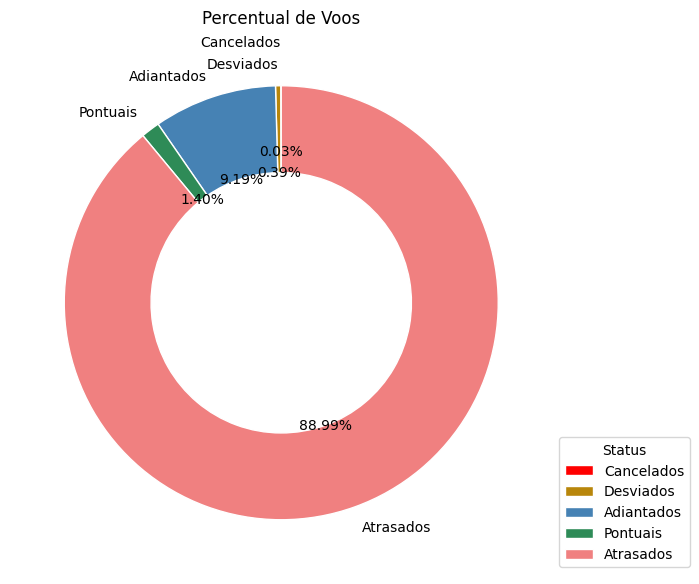

In [100]:
plt.figure(figsize=(7, 8))
explode = (0.1, 0, 0, 0, 0) 
cores = ['red', 'darkgoldenrod', 'steelblue', 'seagreen', 'lightcoral']

wedges, texts, autotexts = plt.pie(percentuais, labels=labels, autopct='%1.2f%%', startangle=90, colors=cores, explode=explode, wedgeprops=dict(width=0.4, edgecolor='w'))

plt.legend(wedges, labels, title='Status', loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentual de Voos')

plt.show()

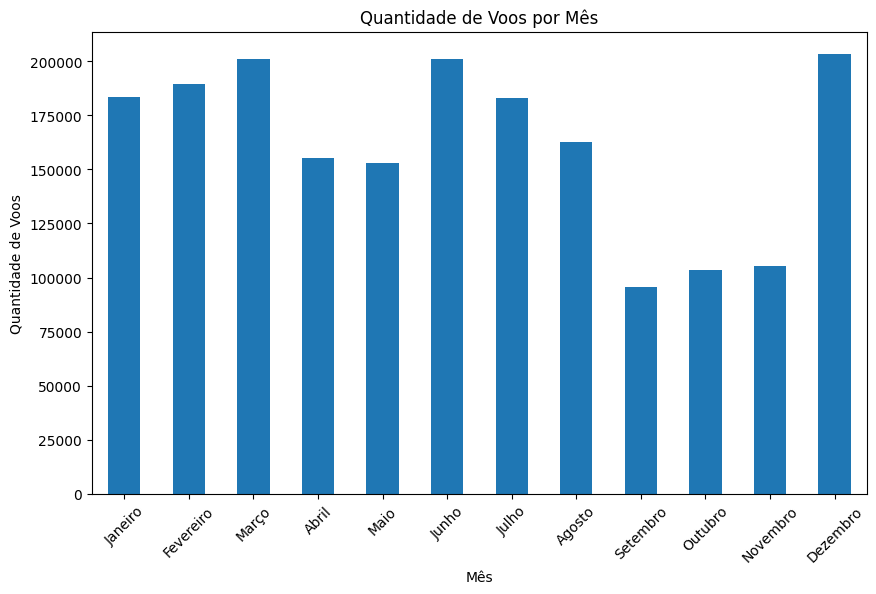

In [101]:
# Mapeamento de números para nomes dos meses
mapa_meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
              7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

contagem_por_mes = df['MES'].value_counts().sort_index()

# Substituir os números pelos nomes dos meses
contagem_por_mes.index = contagem_por_mes.index.map(mapa_meses)

fig, ax = plt.subplots(figsize=(10, 6))
contagem_por_mes.plot(kind='bar')

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade de Voos')
ax.set_title('Quantidade de Voos por Mês')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Exibir o gráfico
plt.show()

Os meses que possuem a maior quantidade de voos programados são dezembro, junho e março.

### Voos Finalizados

Para analisar os voos que foram finalizados deve-se retirar os 8184 valores nulos da DURACAO_VOO_REAL, pois estes ou foram cancelados ou desviados.

In [102]:
df_finalizados = df.dropna(subset=['DURACAO_VOO_REAL'])
df_finalizados = df_finalizados.drop(['CANCELADO', 'MOTIVO_CANCELAMENTO','DESVIADO'], axis = 1)
df_finalizados.isnull().sum()

MES                             0
DIA_MES                         0
DIA_SEMANA                      0
HORA_PARTIDA_REAL               0
HORA_PARTIDA_PROGRAMADA         0
HORA_CHEGADA_REAL               0
HORA_CHEGADA_PROGRAMADA         0
CODIGO_AVIAO                    0
DURACAO_VOO_REAL                0
DURACAO_VOO_PROGRAMADA          0
DURACAO_AR_REAL                 0
ATRASO_CHEGADA                  0
ATRASO_PARTIDA                  0
ORIGEM                          0
DESTINO                         0
DISTANCIA                       0
TEMPO_PISTA_DECOLAGEM           0
TEMPO_PISTA_POUSO               0
TEMPO_ATRASO_COMPANHIA     680881
TEMPO_ATRASO_CLIMA         680881
TEMPO_ATRASO_SNA           680881
TEMPO_ATRASO_SEGURANCA     680881
TEMPO_ATRASO_AERONAVE      680881
dtype: int64

In [103]:
df_finalizados

,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,CODIGO_AVIAO,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_CHEGADA,ATRASO_PARTIDA,ORIGEM,DESTINO,DISTANCIA,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
0,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,3.0,0.0,0.0,0.0,22.0
1936754,12,13,6,657.0,600,904.0,749,DL,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0.0,57.0,18.0,0.0,0.0
1936755,12,13,6,1007.0,847,1149.0,1010,DL,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,1.0,0.0,19.0,0.0,79.0
1936756,12,13,6,1251.0,1240,1446.0,1437,DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,NaN,NaN,NaN,NaN,NaN


#### Pontuais

In [106]:
df_pontuais=df_finalizados[df_finalizados['ATRASO_CHEGADA']==0]
df_pontuais.isnull().sum()

MES                            0
DIA_MES                        0
DIA_SEMANA                     0
HORA_PARTIDA_REAL              0
HORA_PARTIDA_PROGRAMADA        0
HORA_CHEGADA_REAL              0
HORA_CHEGADA_PROGRAMADA        0
CODIGO_AVIAO                   0
DURACAO_VOO_REAL               0
DURACAO_VOO_PROGRAMADA         0
DURACAO_AR_REAL                0
ATRASO_CHEGADA                 0
ATRASO_PARTIDA                 0
ORIGEM                         0
DESTINO                        0
DISTANCIA                      0
TEMPO_PISTA_DECOLAGEM          0
TEMPO_PISTA_POUSO              0
TEMPO_ATRASO_COMPANHIA     27040
TEMPO_ATRASO_CLIMA         27040
TEMPO_ATRASO_SNA           27040
TEMPO_ATRASO_SEGURANCA     27040
TEMPO_ATRASO_AERONAVE      27040
dtype: int64

In [108]:
df_pontuais.shape

(27040, 23)

In [130]:
# Variáveis contínuas
continuas_pontuais = ['DURACAO_VOO_REAL', 'DURACAO_VOO_PROGRAMADA', 'DURACAO_AR_REAL', 
                        'ATRASO_PARTIDA', 'DISTANCIA']

In [131]:
df_pontuais[continuas_pontuais].describe()

,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_PARTIDA,DISTANCIA
count,1.828356e+06,1.828356e+06,1.828356e+06,1.828356e+06,1.828356e+06
mean,1.378640e+02,1.387420e+02,1.126849e+02,4.316936e+01,7.996086e+02
std,7.116759e+01,7.034595e+01,6.777614e+01,5.346363e+01,5.692987e+02
min,3.800000e+01,1.000000e+00,3.500000e+01,6.000000e+00,3.100000e+01
25%,8.500000e+01,8.500000e+01,6.200000e+01,1.200000e+01,3.770000e+02
50%,1.200000e+02,1.200000e+02,9.400000e+01,2.400000e+01,6.340000e+02
75%,1.680000e+02,1.680000e+02,1.400000e+02,5.300000e+01,1.020000e+03
max,1.114000e+03,6.600000e+02,1.091000e+03,2.467000e+03,4.962000e+03


In [128]:
df_pontuais['DURACAO_AR_REAL'].describe(percentiles=[0.01, 0.05,0.1,0.15,0.2,0.25])

count    27040.000000
mean       107.914978
std         67.426252
min          6.000000
1%          25.000000
5%          35.000000
10%         42.000000
15%         48.000000
20%         53.000000
25%         58.000000
50%         91.000000
max        622.000000
Name: DURACAO_AR_REAL, dtype: float64

In [129]:
# Calcular o quantil de 5%
quantil_5 = df_pontuais['DURACAO_AR_REAL'].quantile(0.05)

# Aplicar o filtro
df_pontuais  = df.loc[df['DURACAO_AR_REAL'] >= quantil_5]

In [132]:
df_pontuais[continuas_pontuais].describe()

,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_PARTIDA,DISTANCIA
count,1.828356e+06,1.828356e+06,1.828356e+06,1.828356e+06,1.828356e+06
mean,1.378640e+02,1.387420e+02,1.126849e+02,4.316936e+01,7.996086e+02
std,7.116759e+01,7.034595e+01,6.777614e+01,5.346363e+01,5.692987e+02
min,3.800000e+01,1.000000e+00,3.500000e+01,6.000000e+00,3.100000e+01
25%,8.500000e+01,8.500000e+01,6.200000e+01,1.200000e+01,3.770000e+02
50%,1.200000e+02,1.200000e+02,9.400000e+01,2.400000e+01,6.340000e+02
75%,1.680000e+02,1.680000e+02,1.400000e+02,5.300000e+01,1.020000e+03
max,1.114000e+03,6.600000e+02,1.091000e+03,2.467000e+03,4.962000e+03


Text(0.5, 1.0, 'Correlação de spearman')

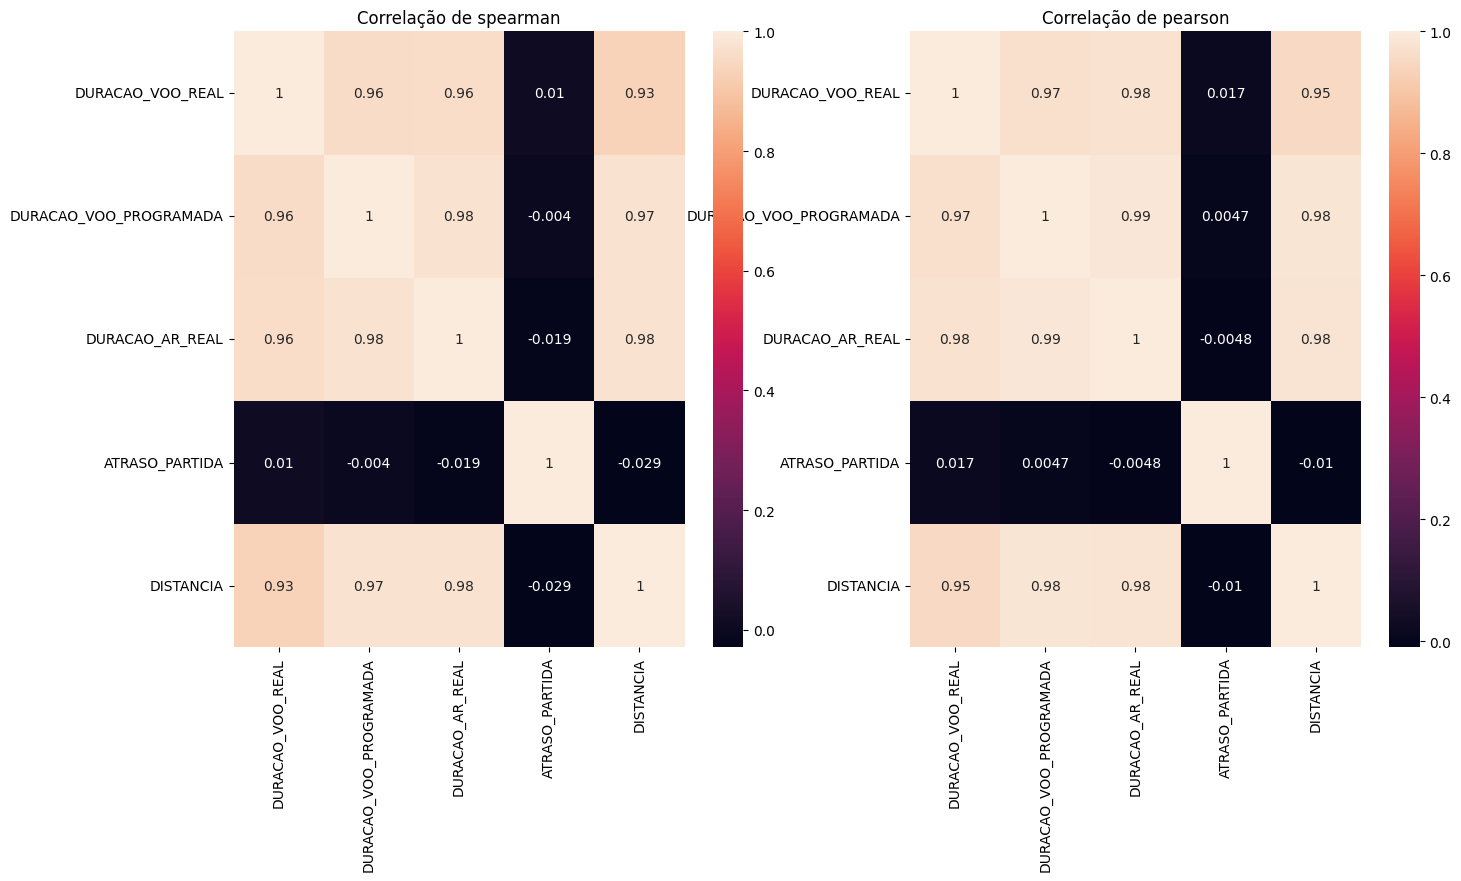

In [133]:
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(df_pontuais[continuas_pontuais].corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(df_pontuais[continuas_pontuais].corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

Há uma correlação forte, linear e positiva entre a duração do voo, isto é, quanto maior a distância, maior é a duração do voo.

#### Adiantados

In [119]:
df_adiantados=df_finalizados[df_finalizados['ATRASO_CHEGADA']<0]

In [120]:
df_adiantados.shape

(177915, 23)

In [121]:
df_adiantados.isnull().sum()

MES                             0
DIA_MES                         0
DIA_SEMANA                      0
HORA_PARTIDA_REAL               0
HORA_PARTIDA_PROGRAMADA         0
HORA_CHEGADA_REAL               0
HORA_CHEGADA_PROGRAMADA         0
CODIGO_AVIAO                    0
DURACAO_VOO_REAL                0
DURACAO_VOO_PROGRAMADA          0
DURACAO_AR_REAL                 0
ATRASO_CHEGADA                  0
ATRASO_PARTIDA                  0
ORIGEM                          0
DESTINO                         0
DISTANCIA                       0
TEMPO_PISTA_DECOLAGEM           0
TEMPO_PISTA_POUSO               0
TEMPO_ATRASO_COMPANHIA     177915
TEMPO_ATRASO_CLIMA         177915
TEMPO_ATRASO_SNA           177915
TEMPO_ATRASO_SEGURANCA     177915
TEMPO_ATRASO_AERONAVE      177915
dtype: int64

Os 177915 adiantados estão com nulo nas colunas de tempo de atraso.

In [122]:
# Variáveis contínuas
continuas_adiantadas = ['DURACAO_VOO_REAL', 'DURACAO_VOO_PROGRAMADA', 'DURACAO_AR_REAL', 
                        'ATRASO_CHEGADA', 'ATRASO_PARTIDA', 'DISTANCIA']

In [124]:
df_adiantados[continuas_adiantada].describe()

,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_CHEGADA,ATRASO_PARTIDA,DISTANCIA
count,177915.000000,177915.000000,177915.000000,177915.000000,177915.000000,177915.000000
mean,149.891263,167.101891,131.170475,-6.897288,10.313341,1012.804165
std,77.708836,80.642303,75.662262,6.102352,4.912783,658.983013
min,15.000000,25.000000,1.000000,-109.000000,6.000000,31.000000
25%,92.000000,106.000000,75.000000,-9.000000,7.000000,528.000000
50%,133.000000,150.000000,115.000000,-5.000000,9.000000,862.000000
75%,191.000000,210.000000,171.000000,-2.000000,12.000000,1399.000000
max,648.000000,660.000000,626.000000,-1.000000,96.000000,4962.000000


In [125]:
df_adiantados['ATRASO_CHEGADA'].describe(percentiles=[0.01, 0.05,0.1,0.15,0.2,0.25])

count    177915.000000
mean         -6.897288
std           6.102352
min        -109.000000
1%          -29.000000
5%          -19.000000
10%         -15.000000
15%         -12.000000
20%         -11.000000
25%          -9.000000
50%          -5.000000
max          -1.000000
Name: ATRASO_CHEGADA, dtype: float64

In [257]:
df_adiantados = df_adiantados[df_adiantados['ATRASO_CHEGADA']>=-30]

In [258]:
df_adiantados['DURACAO_AR_REAL'].describe(percentiles=[0.01, 0.05,0.1,0.15,0.2,0.25])

count    176632.000000
mean        130.517035
std          75.121523
min           1.000000
1%           27.000000
5%           41.000000
10%          49.000000
15%          57.000000
20%          66.000000
25%          75.000000
50%         114.000000
max         626.000000
Name: DURACAO_AR_REAL, dtype: float64

In [259]:
df_adiantados = df_adiantados[df_adiantados['DURACAO_AR_REAL']>=30]

In [260]:
df_adiantados['ATRASO_PARTIDA'].describe(percentiles=[0.75, 0.8,0.85,0.9,0.95, 0.99])

count    174068.000000
mean         10.337581
std           4.926298
min           6.000000
50%           9.000000
75%          12.000000
80%          13.000000
85%          15.000000
90%          17.000000
95%          20.000000
99%          28.000000
max          96.000000
Name: ATRASO_PARTIDA, dtype: float64

In [261]:
df_adiantados = df_adiantados[df_adiantados['ATRASO_PARTIDA']<=30]

In [262]:
df_adiantados[continuas].describe()

,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,DURACAO_AR_REAL,ATRASO_CHEGADA,ATRASO_PARTIDA,DISTANCIA
count,172893.000000,172893.000000,172893.000000,172893.000000,172893.000000,172893.000000
mean,150.394545,167.279057,131.672514,-6.720544,10.163968,1016.404169
std,76.316146,78.820719,74.284549,5.560573,4.441338,647.682322
min,35.000000,45.000000,30.000000,-30.000000,6.000000,84.000000
25%,93.000000,108.000000,76.000000,-9.000000,7.000000,534.000000
50%,134.000000,150.000000,115.000000,-5.000000,9.000000,866.000000
75%,190.000000,210.000000,171.000000,-2.000000,12.000000,1390.000000
max,648.000000,660.000000,626.000000,-1.000000,30.000000,4962.000000


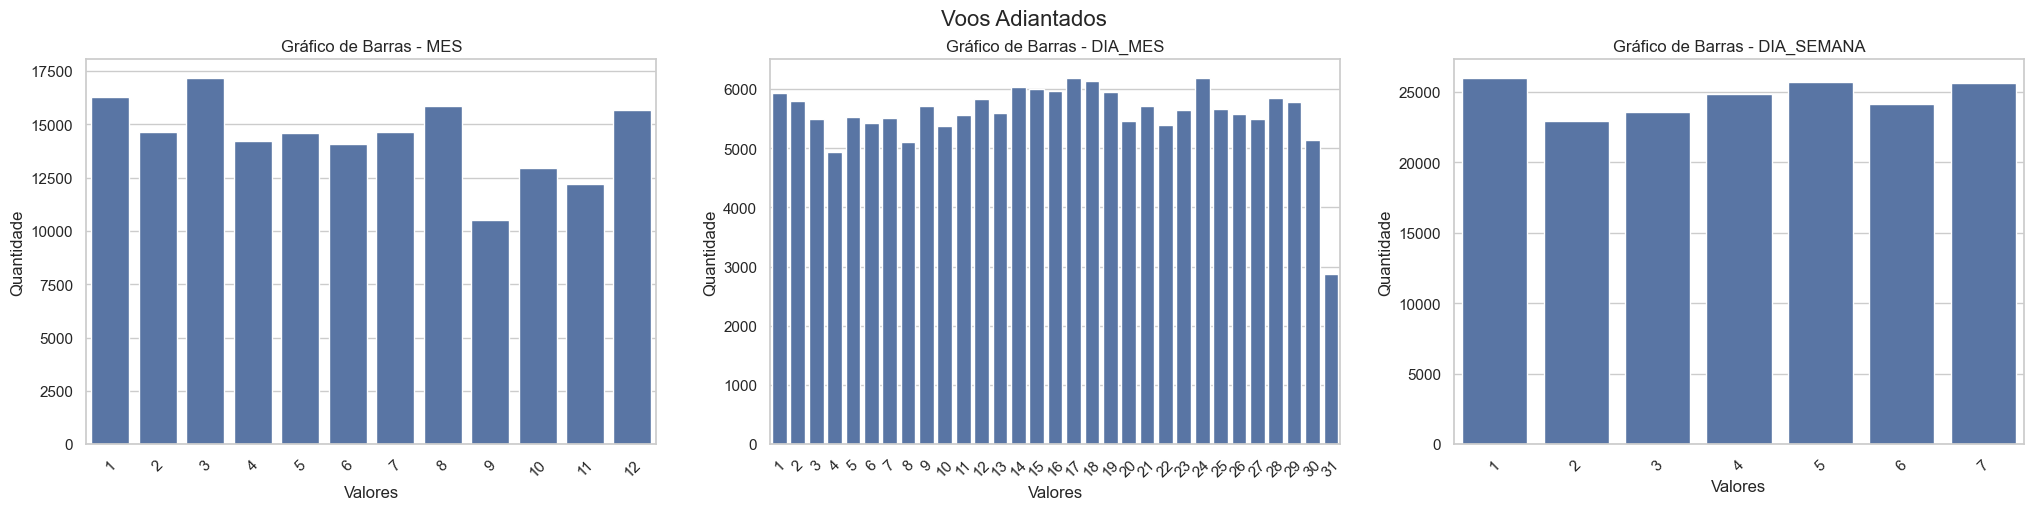

In [280]:
# Configuração da figura com três subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Itera sobre cada variável qualitativa ordinal e o subplot correspondente
for variavel, ax in zip(qualitativas, axs.flatten()):
    sns.countplot(x=variavel, data=df_adiantados[[variavel]], ax=ax)
    
    # Configurações do subplot
    ax.set_title(f'Gráfico de Barras - {variavel}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Quantidade')
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Voos Adiantados', fontsize=16)

plt.show()

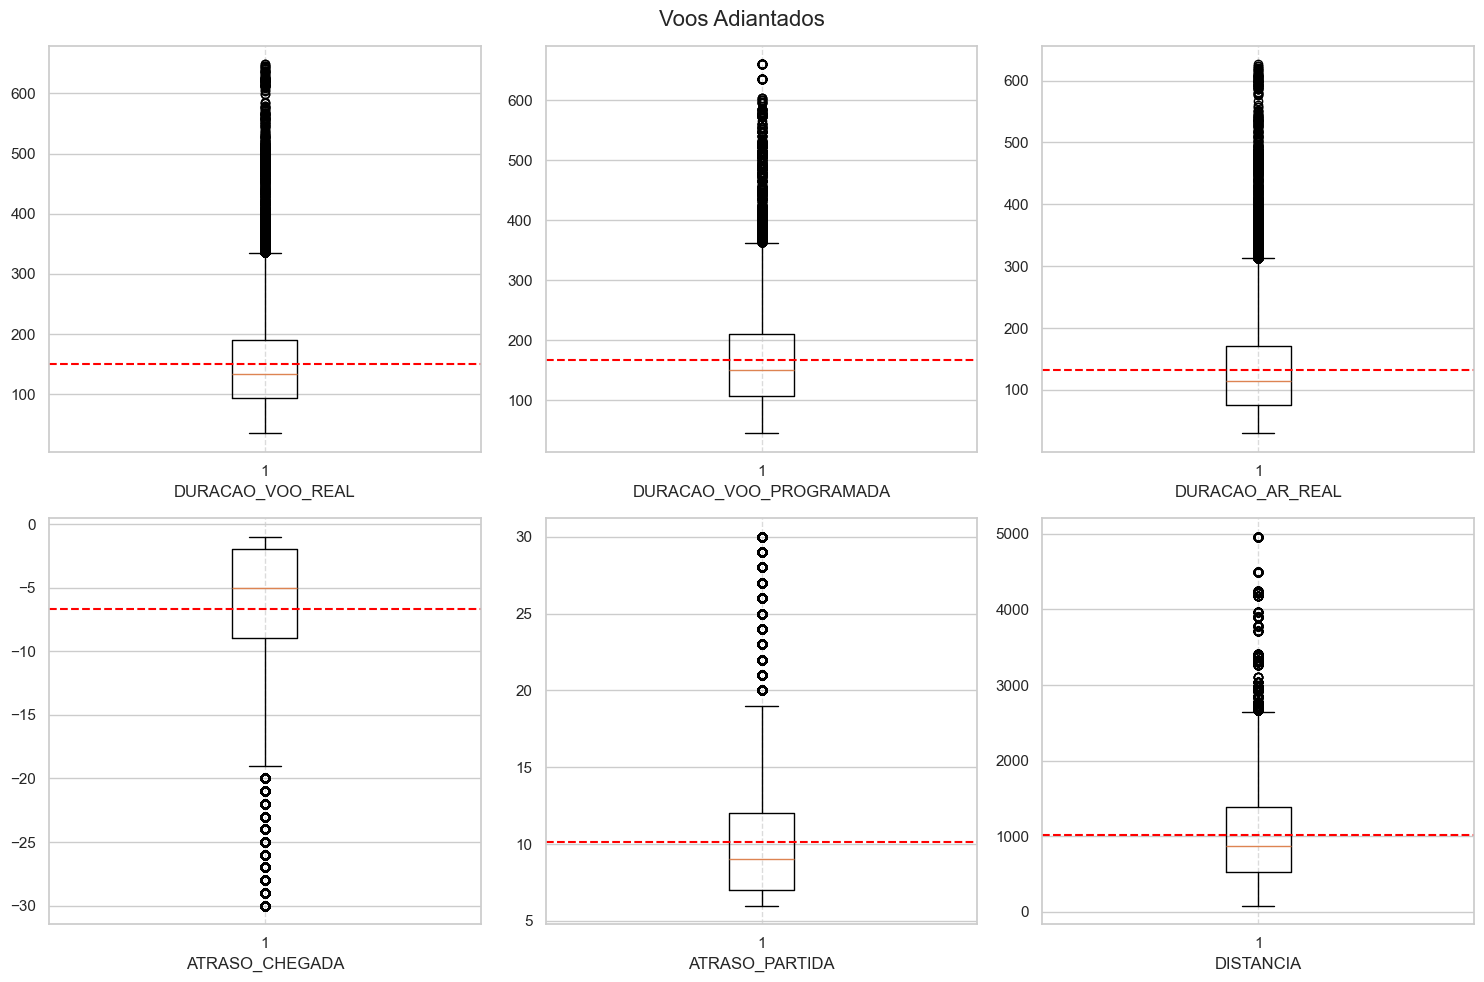

In [264]:
fig = plt.figure(figsize=(15, 10))

# Subplots organizados em 2 linhas e 3 colunas
for i, col in enumerate(continuas):
    plt.subplot(2,3,i+1)
    plt.boxplot(df_adiantados[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df_adiantados[col].mean(), linestyle='--', color="red")

fig.suptitle('Voos Adiantados', fontsize=16)   
plt.tight_layout()     
plt.show()

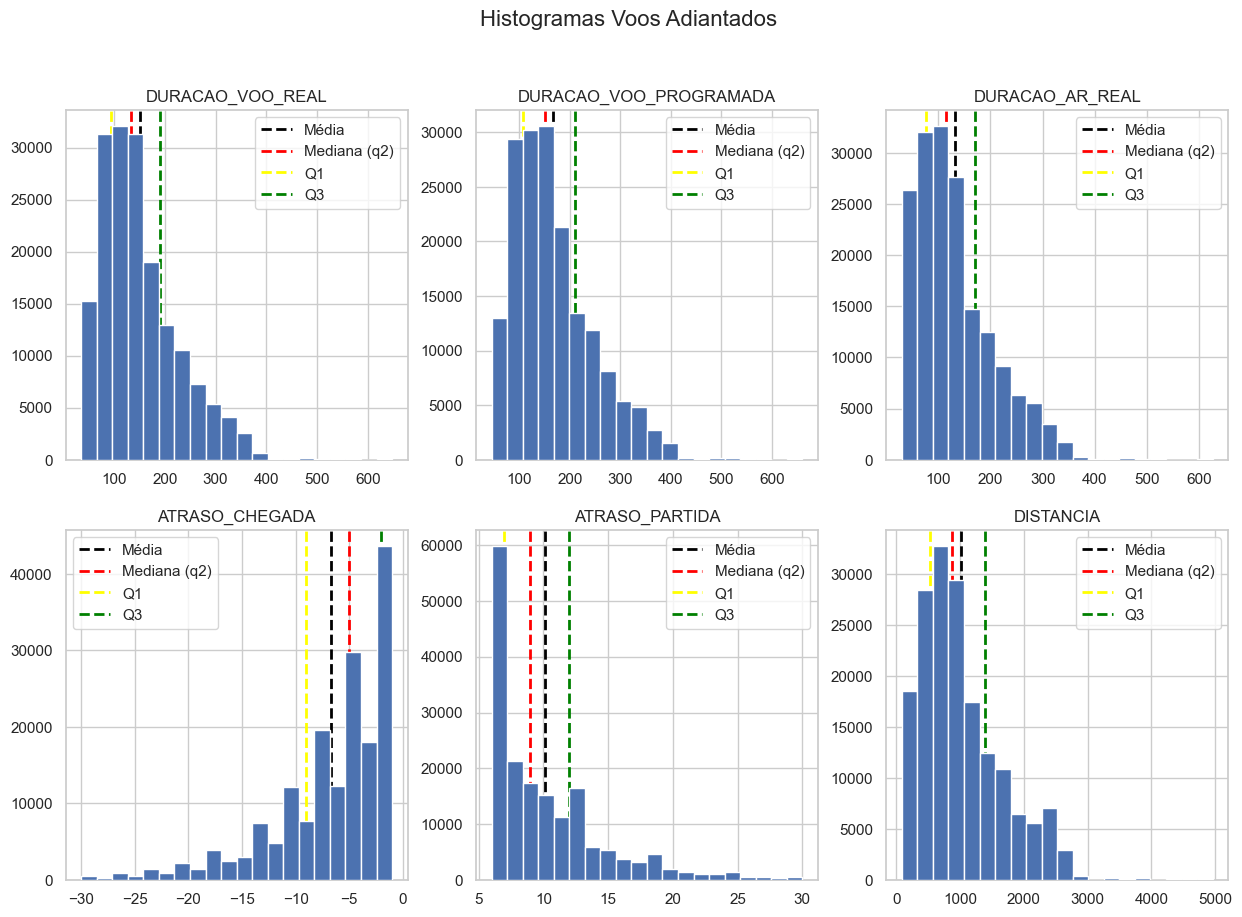

In [272]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in zip(continuas, axs.flatten()):
    df_adiantados[i].hist(bins=20,ax=ax, zorder=4)
    ax.set_title(f'{i}')
    ax.axvline(x=df_adiantados[i].mean(), color='black', linestyle='dashed', linewidth=2, label='Média')
    ax.axvline(x=np.median(df_adiantados[i]), color='red', linestyle='dashed', linewidth=2, label='Mediana (q2)')
    ax.axvline(x=np.percentile(df_adiantados[i], 25), color='yellow', linestyle='dashed', linewidth=2, label='Q1')
    ax.axvline(x=np.percentile(df_adiantados[i], 75), color='green', linestyle='dashed', linewidth=2, label='Q3')
    ax.legend()
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas Voos Adiantados', fontsize=16, zorder=1)

plt.show()

A maioria dos voos tem até 2 horas de duração (os dados de duração estão representados em minutos). 
Ao analisar um voo aleatório da base de dados há 75% de chance do atraso de chegada ser de até 9 minutos. Se o atraso de partida for analisado, há 75% de chance de ser de até 12 minutos. 
A maior concentração de voos é para trajetos de até 1400 milhas de distância. 

### Cancelados

In [134]:
qualitativas_nominais_cancel = ['CODIGO_AVIAO', 'MOTIVO_CANCELAMENTO']

In [135]:
# Criando um df só com voos cancelados
cancelados = df[df['CANCELADO']==1]


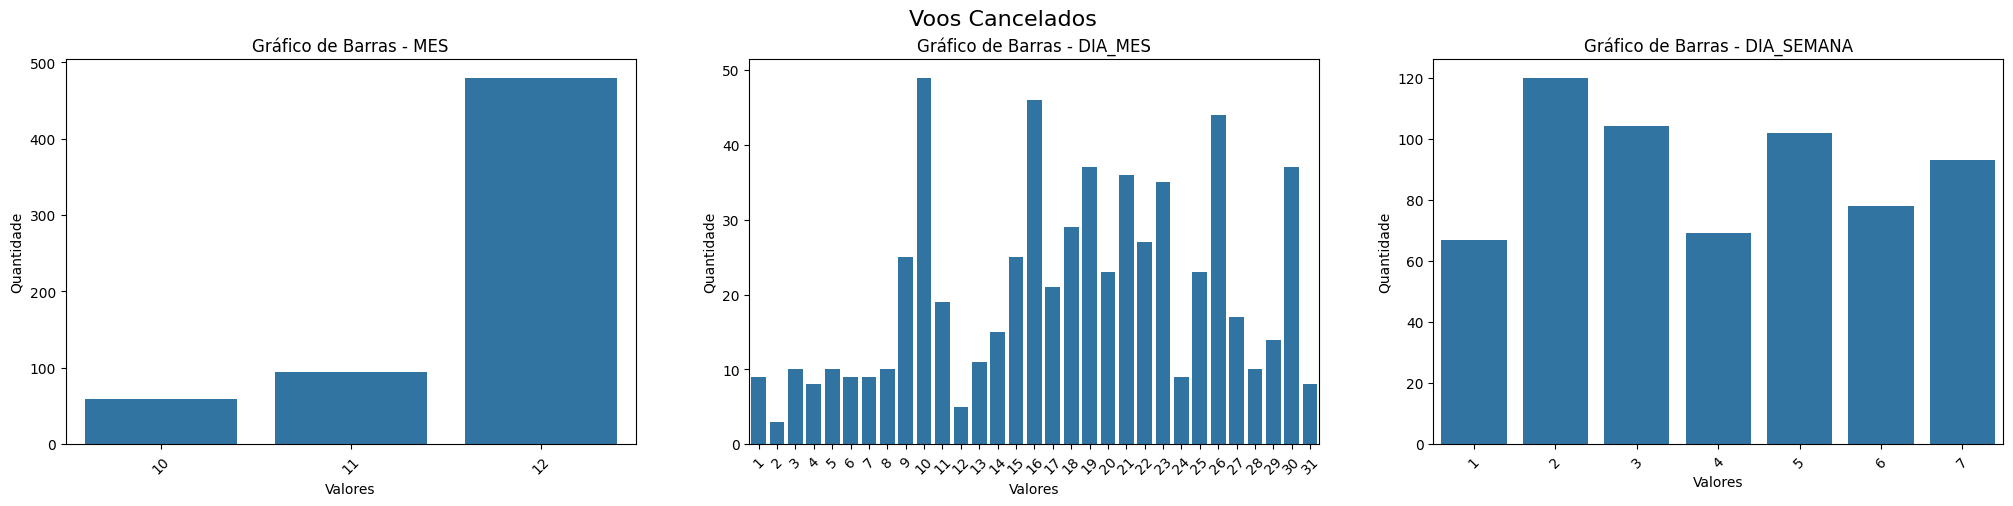

In [136]:
# Configuração da figura com três subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Itera sobre cada variável qualitativa ordinal e o subplot correspondente
for variavel, ax in zip(qualitativas, axs.flatten()):
    sns.countplot(x=variavel, data=cancelados[[variavel]], ax=ax)
    
    # Configurações do subplot
    ax.set_title(f'Gráfico de Barras - {variavel}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Quantidade')
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Voos Cancelados', fontsize=16)

plt.show()

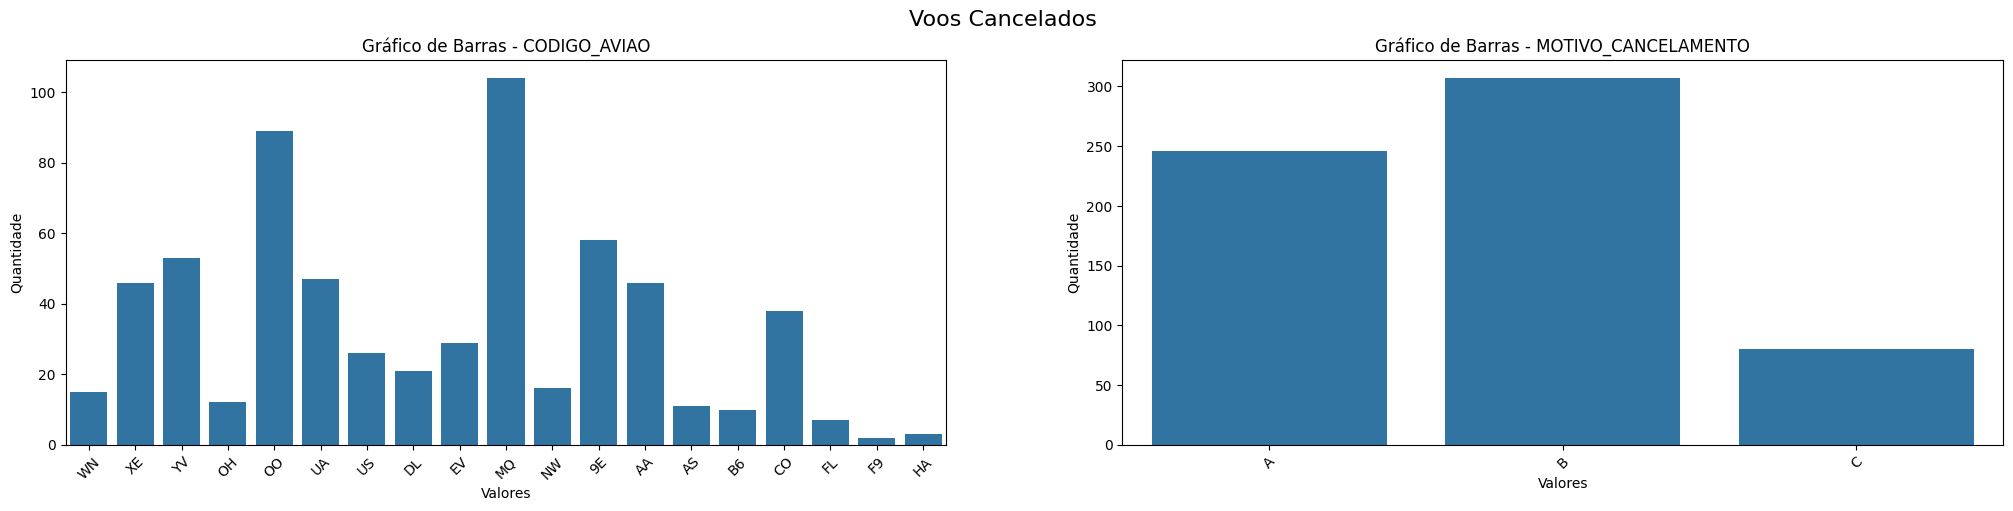

In [137]:
# Configuração da figura com três subplots
fig, axs = plt.subplots(1, 2, figsize=(25, 5))

# Itera sobre cada variável qualitativa ordinal e o subplot correspondente
for variavel, ax in zip(qualitativas_nominais_cancel, axs.flatten()):
    sns.countplot(x=variavel, data=cancelados[[variavel]], ax=ax)
    
    # Configurações do subplot
    ax.set_title(f'Gráfico de Barras - {variavel}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Quantidade')
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Voos Cancelados', fontsize=16)

plt.show()

Sendo A = transportadora, B = clima, C = NAS(National Airspace System), D = segurança.

Analisaremos os horários de partida programados que mais tem cancelamentos de voos.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


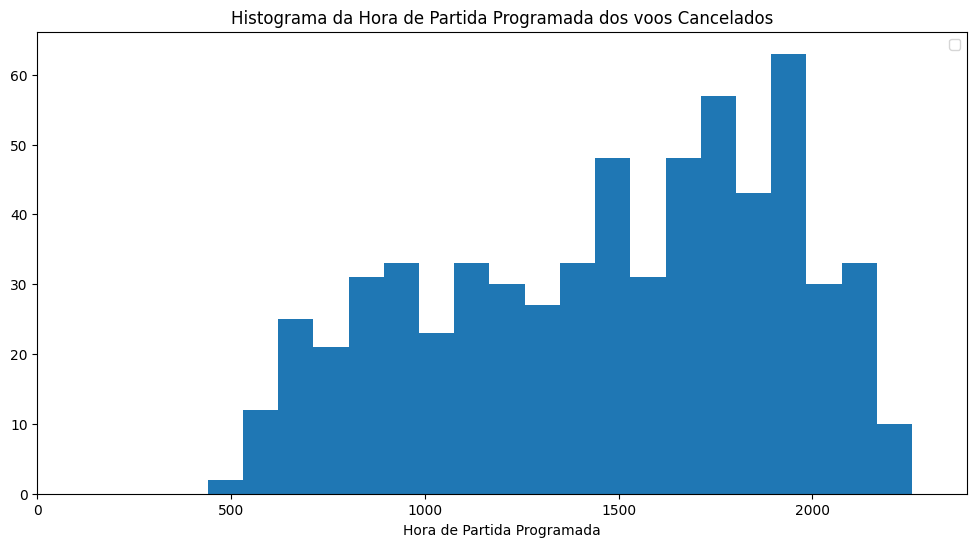

In [138]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([cancelados['HORA_PARTIDA_PROGRAMADA']], bins=20)

ax.set_xlim(0,2400)

ax.set_xlabel('Hora de Partida Programada')
ax.set_title('Histograma da Hora de Partida Programada dos voos Cancelados')

plt.legend()
plt.show()

Os maiores cancelamentos estão distribuidos entre 18:00 e 20:00.

In [139]:
cancel2 = cancelados[['CANCELADO','ATRASO_CHEGADA','ATRASO_PARTIDA', 'TEMPO_PISTA_DECOLAGEM',
                      'TEMPO_PISTA_POUSO','TEMPO_ATRASO_COMPANHIA','TEMPO_ATRASO_CLIMA',
                      'TEMPO_ATRASO_SNA','TEMPO_ATRASO_SEGURANCA','TEMPO_ATRASO_AERONAVE', 
                      'HORA_PARTIDA_REAL', 'HORA_CHEGADA_REAL', 'HORA_PARTIDA_PROGRAMADA', 'DURACAO_VOO_PROGRAMADA']]

print(cancel2)
print(cancel2.isna().sum()) 

         CANCELADO  ATRASO_CHEGADA  ATRASO_PARTIDA  TEMPO_PISTA_DECOLAGEM  \
1542406          1             NaN           122.0                    NaN   
1546593          1             NaN            28.0                    NaN   
1547161          1             NaN            10.0                    NaN   
1547178          1             NaN            18.0                    NaN   
1548271          1             NaN           118.0                    NaN   
...            ...             ...             ...                    ...   
1934590          1             NaN            42.0                    NaN   
1935491          1             NaN             9.0                    NaN   
1935651          1             NaN            12.0                    NaN   
1935876          1             NaN            31.0                    NaN   
1936470          1             NaN            33.0                    NaN   

         TEMPO_PISTA_POUSO  TEMPO_ATRASO_COMPANHIA  TEMPO_ATRASO_CLIMA  \
1

In [141]:
canceladas_continuas = ['ATRASO_PARTIDA', 'HORA_PARTIDA_REAL', 'HORA_PARTIDA_PROGRAMADA', 'DURACAO_VOO_PROGRAMADA']       

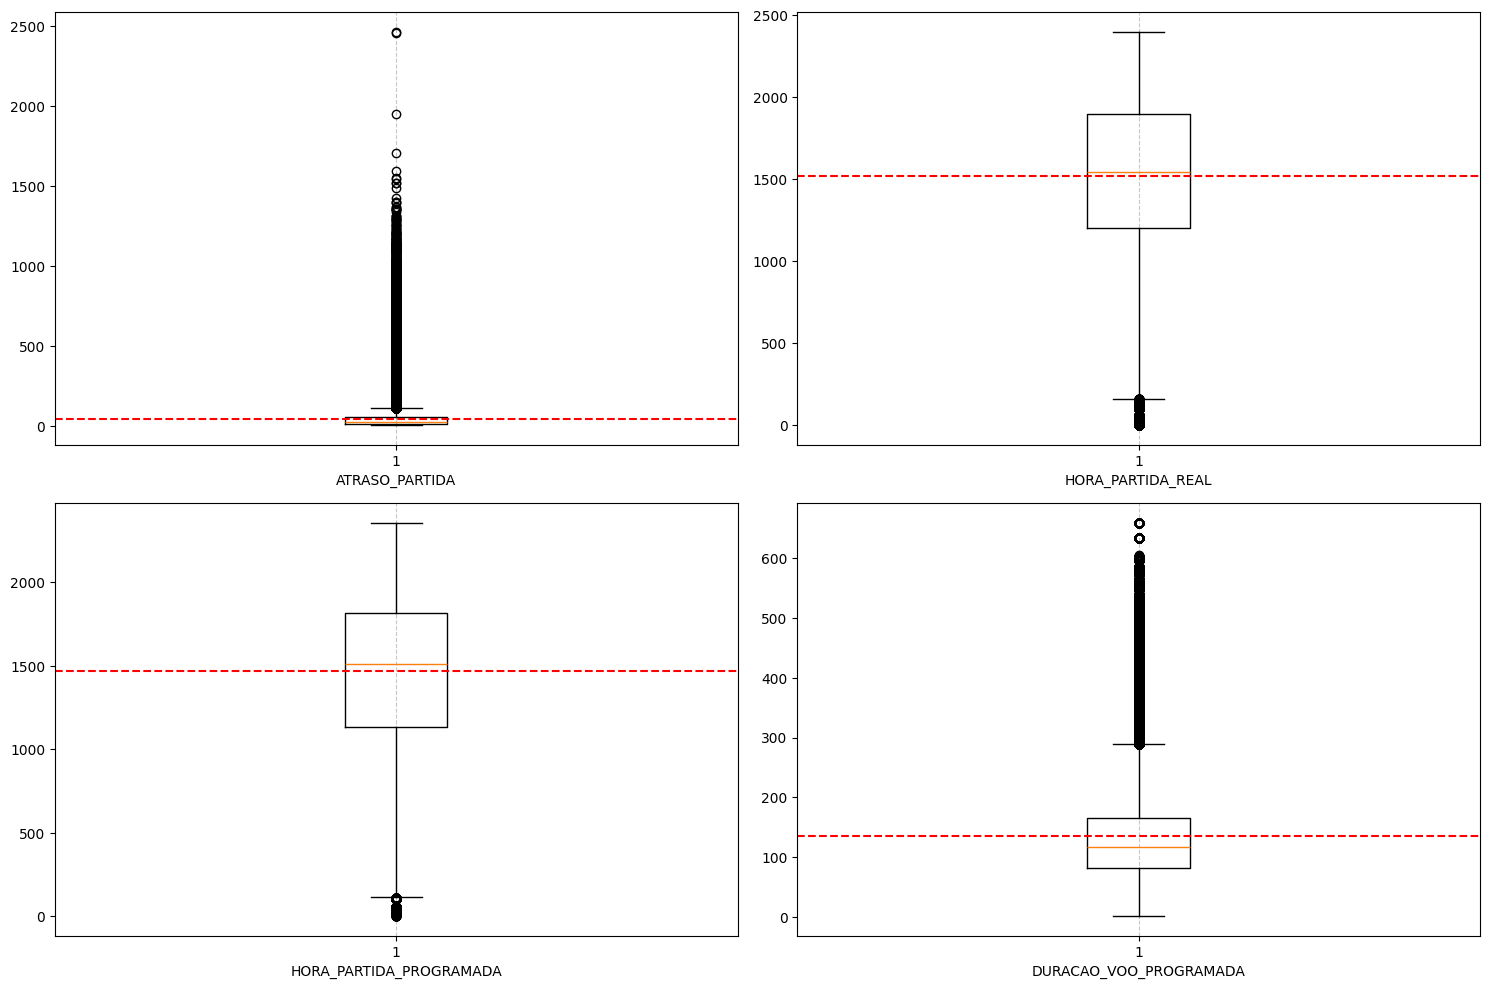

In [142]:
fig = plt.figure(figsize=(15, 10))

# Subplots organizados em 3 linhas e 4 colunas
for i, col in enumerate(canceladas_continuas):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.axhline(y=df[col].mean(), linestyle='--', color="red")
    
plt.tight_layout()     
plt.show()

In [92]:
df[canceladas_continuas].corr()

,ATRASO_PARTIDA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,DURACAO_VOO_PROGRAMADA
ATRASO_PARTIDA,1.000000,0.139254,0.058875,0.007001
HORA_PARTIDA_REAL,0.139254,1.000000,0.881598,-0.044619
HORA_PARTIDA_PROGRAMADA,0.058875,0.881598,1.000000,-0.026388
DURACAO_VOO_PROGRAMADA,0.007001,-0.044619,-0.026388,1.000000


Text(0.5, 1.0, 'Correlação de spearman')

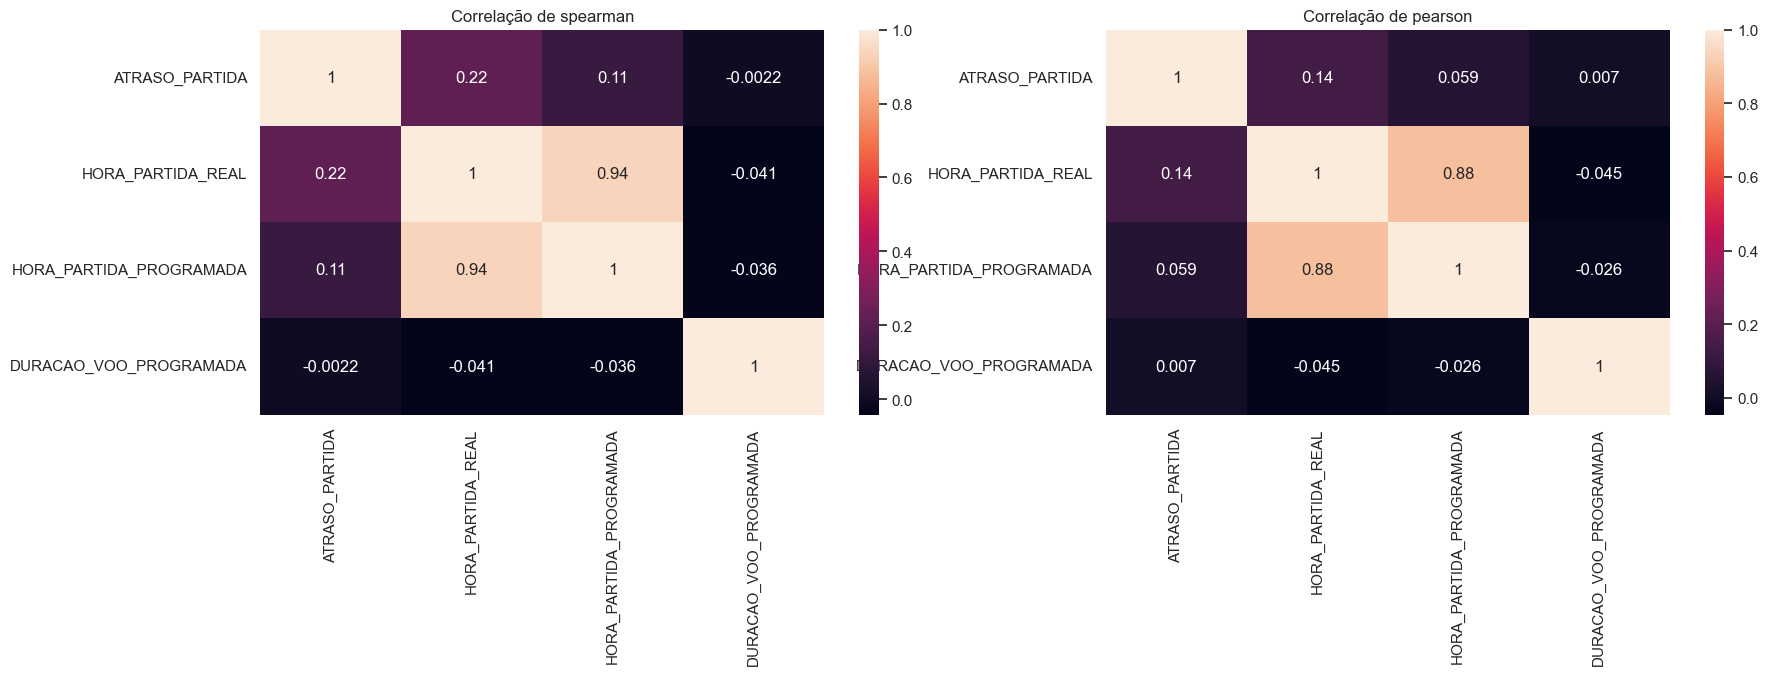

In [94]:
fig, ax = plt.subplots(1,2, figsize = ( 20,5))
sns.heatmap(df[canceladas_continuas].corr(method = "spearman"), ax = ax[0], annot = True)
sns.heatmap(df[canceladas_continuas].corr(method = "pearson"), ax = ax[1], annot = True)
ax[1].set_title("Correlação de pearson")
ax[0].set_title("Correlação de spearman")

In [63]:
cancelados[cancelados['TEMPO_PISTA_POUSO'].isnull() == False]

,MES,DIA_MES,DIA_SEMANA,HORA_PARTIDA_REAL,HORA_PARTIDA_PROGRAMADA,HORA_CHEGADA_REAL,HORA_CHEGADA_PROGRAMADA,CODIGO_AVIAO,DURACAO_VOO_REAL,DURACAO_VOO_PROGRAMADA,...,TEMPO_PISTA_DECOLAGEM,TEMPO_PISTA_POUSO,CANCELADO,MOTIVO_CANCELAMENTO,DESVIADO,TEMPO_ATRASO_COMPANHIA,TEMPO_ATRASO_CLIMA,TEMPO_ATRASO_SNA,TEMPO_ATRASO_SEGURANCA,TEMPO_ATRASO_AERONAVE
1542406,10,27,1,1622.0,1420,NaN,1520,WN,NaN,60.0,...,NaN,19.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1551498,10,10,5,1502.0,1450,NaN,1546,YV,NaN,56.0,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1554263,10,30,4,2221.0,1848,NaN,2112,YV,NaN,204.0,...,NaN,12.0,1,A,0,NaN,NaN,NaN,NaN,NaN
1557726,10,11,6,1750.0,1646,NaN,1747,OO,NaN,61.0,...,NaN,19.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1558168,10,28,2,907.0,857,NaN,956,OO,NaN,59.0,...,NaN,14.0,1,B,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926175,12,21,7,2130.0,1915,NaN,2229,CO,NaN,374.0,...,NaN,28.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1926337,12,21,7,2023.0,1925,NaN,2223,CO,NaN,298.0,...,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1933981,12,5,5,2253.0,2240,NaN,2337,DL,NaN,57.0,...,NaN,13.0,1,B,0,NaN,NaN,NaN,NaN,NaN
1935651,12,10,3,1459.0,1447,NaN,1650,DL,NaN,123.0,...,NaN,37.0,1,A,0,NaN,NaN,NaN,NaN,NaN


### Desviados

In [76]:
qualitativas_nominais_desviado = ['CODIGO_AVIAO', 'ORIGEM', 'DESTINO']

In [70]:
# Criando um df só com voos cancelados
desviados = df[df['DESVIADO']==1]

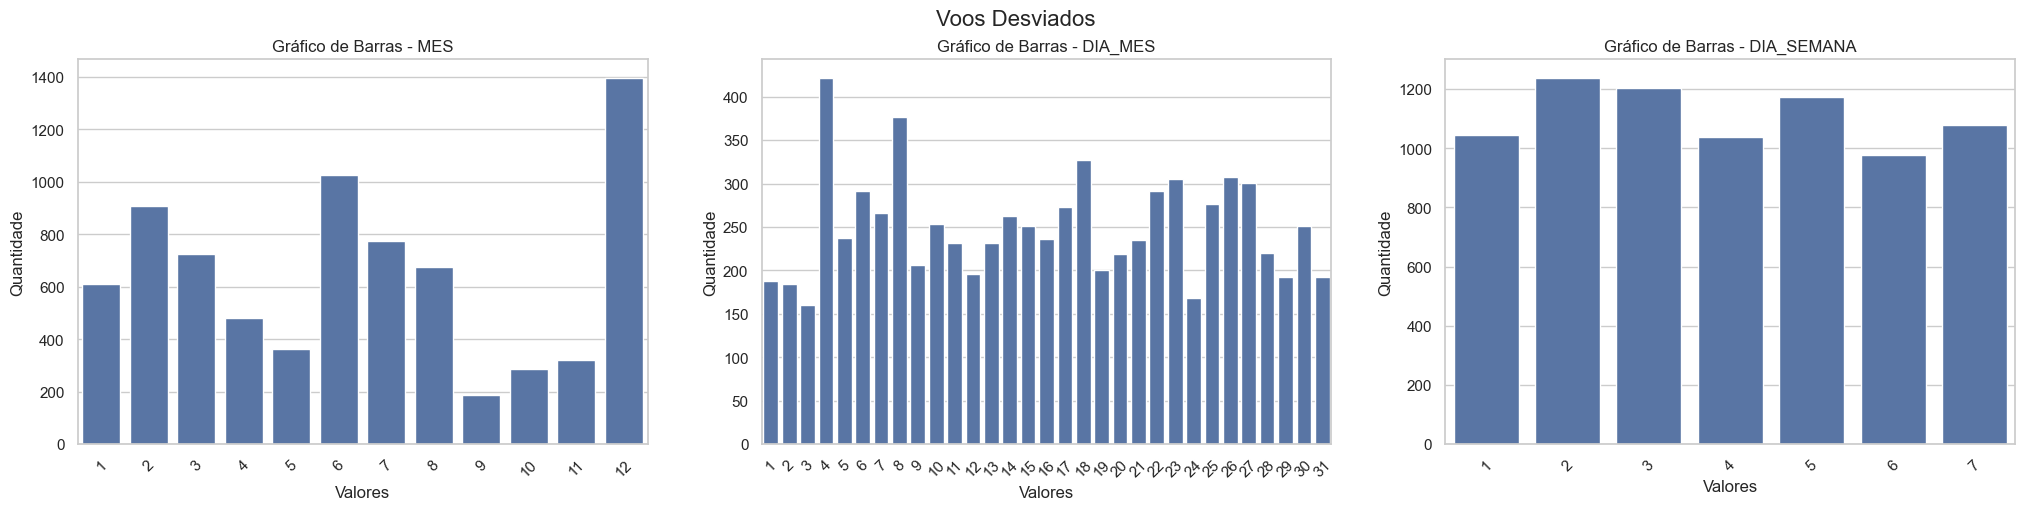

In [274]:
# Configuração da figura com três subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Itera sobre cada variável qualitativa ordinal e o subplot correspondente
for variavel, ax in zip(qualitativas, axs.flatten()):
    sns.countplot(x=variavel, data=desviados[[variavel]], ax=ax)
    
    # Configurações do subplot
    ax.set_title(f'Gráfico de Barras - {variavel}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Quantidade')
    ax.tick_params(axis='x', rotation=45)
fig.suptitle('Voos Desviados', fontsize=16)

plt.show()